In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb

# ETL

In [4]:
# Reading yield data from local file
df=pd.read_excel('Data/Manitoba_yield_02_22.xlsx')

In [5]:
df.head()

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/acre(Metric),Yield/acre(Metric).1,Yield/acre(Imperial)
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452 Tonnes,Tonnes,997 Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449 Tonnes,Tonnes,991 Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449 Tonnes,Tonnes,990 Pounds
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444 Tonnes,Tonnes,980 Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439 Tonnes,Tonnes,968 Pounds


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61044 entries, 0 to 61043
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  61044 non-null  int64 
 1   Risk Area / R.M.      61044 non-null  object
 2   Crop                  61044 non-null  object
 3   Soil                  61044 non-null  object
 4   Farms                 61044 non-null  object
 5   Acres                 61044 non-null  object
 6   Yield/acre(Metric)    61044 non-null  object
 7   Yield/acre(Metric).1  24887 non-null  object
 8   Yield/acre(Imperial)  24887 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.2+ MB


In [7]:
df.head()

,Year,Risk Area / R.M.,Crop,Soil,Farms,Acres,Yield/acre(Metric),Yield/acre(Metric).1,Yield/acre(Imperial)
0,2003,MONTCALM,CANARYSEED,D,7,764,0.452 Tonnes,Tonnes,997 Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",0.449 Tonnes,Tonnes,991 Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,0.449 Tonnes,Tonnes,990 Pounds
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",0.444 Tonnes,Tonnes,980 Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,0.439 Tonnes,Tonnes,968 Pounds


In [8]:
# Changing columns names
df=df.rename(columns={'Risk Area / R.M.': 'RM', 'Yield/acre(Imperial)': 'Yield'})\
    .drop(columns=['Yield/acre(Metric)', 'Yield/acre(Metric).1'])

In [9]:
#removing farms with below
df = df[df['Farms']!='Below']
df

,Year,RM,Crop,Soil,Farms,Acres,Yield
0,2003,MONTCALM,CANARYSEED,D,7,764,997 Pounds
1,2004,PIPESTONE,CANARYSEED,F,8,"1,180.0",991 Pounds
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,517,990 Pounds
3,2009,MORRIS,CANARYSEED,D,3,"1,072.0",980 Pounds
4,2002,ROLAND,CANARYSEED,D,6,981,968 Pounds
...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,673,0.381 Tons
24883,2021,WEST INTERLAKE,ALFALFA,H,14,862,0.332 Tons
24884,2005,GREY,ARGENTINE CANOLA,E,3,595,0.3 Bushels
24885,2021,HANOVER,ALFALFA,E,5,543,0.257 Tons


In [10]:
#splitting Yield and Yield Type
# Splitting Yield column to two - numeric and unit columns and 
df=pd.concat([
    df,
    df['Yield'].str.split(' ', expand=True).rename(columns={0:'Yield_Float', 1:'Unit'})], axis=1)

In [11]:
#Changing datatype for Farms, Acres, Yield_Float
# Replace commas and convert to float
df['Yield_Float'] = df['Yield_Float'].str.replace(',', '').astype(float)


In [12]:
#Changing Acres to float
df['Acres'] = df['Acres'].str.replace(',', '').astype(float)

In [13]:
df['Farms'] = df['Farms'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24887 entries, 0 to 24886
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         24887 non-null  int64  
 1   RM           24887 non-null  object 
 2   Crop         24887 non-null  object 
 3   Soil         24887 non-null  object 
 4   Farms        24887 non-null  int32  
 5   Acres        17257 non-null  float64
 6   Yield        24887 non-null  object 
 7   Yield_Float  24887 non-null  float64
 8   Unit         24887 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 1.8+ MB


In [15]:
# Filter rows where 'Crop' is 'Alfalfa' and 'Unit' is 'Bushels'
alfalfa_bushels_rows = df[(df['Crop'] == 'ALFALFA') & (df['Unit'] == 'Bushels')]

## Standard Bushel to Tonn Conversion based on each crop
- CANARYSEED: 1 bushel ≈ 0.02 tons
- LENTILS: 1 bushel ≈ 0.022 tons
- FABABEANS: 1 bushel ≈ 0.027 tons
- OATS: 1 bushel ≈ 0.025 tons
- BARLEY: 1 bushel ≈ 0.027 tons
- WINTER WHEAT: 1 bushel ≈ 0.027 tons
- ARGENTINE CANOLA: 1 bushel ≈ 0.022 tons
- FIELD PEAS: 1 bushel ≈ 0.027 tons
- DURUM WHEAT: 1 bushel ≈ 0.027 tons
- FLAX: 1 bushel ≈ 0.024 tons


In [16]:
def convert_to_tons(df):
    # Conversion factors
    bushels_to_tons = {'Bushels': 0.027, 'Tons': 1, 'Pounds': 0.0005}

    # Apply conversion based on the 'Unit' column
    df['Yield_in_Tons'] = df.apply(lambda row: row['Yield_Float'] * bushels_to_tons.get(row['Unit'], 1), axis=1)

    return df


In [17]:
df = convert_to_tons(df)

In [18]:
df

,Year,RM,Crop,Soil,Farms,Acres,Yield,Yield_Float,Unit,Yield_in_Tons
0,2003,MONTCALM,CANARYSEED,D,7,NaN,997 Pounds,997.000,Pounds,0.4985
1,2004,PIPESTONE,CANARYSEED,F,8,1180.0,991 Pounds,991.000,Pounds,0.4955
2,2003,BIFROST-RIVERTON,CANARYSEED,F,4,NaN,990 Pounds,990.000,Pounds,0.4950
3,2009,MORRIS,CANARYSEED,D,3,1072.0,980 Pounds,980.000,Pounds,0.4900
4,2002,ROLAND,CANARYSEED,D,6,NaN,968 Pounds,968.000,Pounds,0.4840
...,...,...,...,...,...,...,...,...,...,...
24882,2021,WEST INTERLAKE,ALFALFA,G,10,NaN,0.381 Tons,0.381,Tons,0.3810
24883,2021,WEST INTERLAKE,ALFALFA,H,14,NaN,0.332 Tons,0.332,Tons,0.3320
24884,2005,GREY,ARGENTINE CANOLA,E,3,NaN,0.3 Bushels,0.300,Bushels,0.0081
24885,2021,HANOVER,ALFALFA,E,5,NaN,0.257 Tons,0.257,Tons,0.2570


In [19]:
df[(df['RM'] == 'MONTCALM') & (df['Farms'] == 7)].sort_values(by='Year', ascending=True)


,Year,RM,Crop,Soil,Farms,Acres,Yield,Yield_Float,Unit,Yield_in_Tons
23213,2000,MONTCALM,FLAX,E,7,1259.0,17.4 Bushels,17.4,Bushels,0.4698
63,2002,MONTCALM,CANARYSEED,C,7,NaN,493 Pounds,493.0,Pounds,0.2465
10106,2002,MONTCALM,WINTER WHEAT,C,7,1609.0,53.7 Bushels,53.7,Bushels,1.4499
0,2003,MONTCALM,CANARYSEED,D,7,NaN,997 Pounds,997.0,Pounds,0.4985
23920,2005,MONTCALM,BARLEY,D,7,1552.0,12.2 Bushels,12.2,Bushels,0.3294
22753,2006,MONTCALM,FLAX,C,7,NaN,19.5 Bushels,19.5,Bushels,0.5265
344,2008,MONTCALM,OATS,E,7,1890.0,140.2 Bushels,140.2,Bushels,3.7854
19767,2009,MONTCALM,FLAX,D,7,NaN,28.5 Bushels,28.5,Bushels,0.7695
21015,2010,MONTCALM,FLAX,C,7,1191.0,25.3 Bushels,25.3,Bushels,0.6831
7517,2011,MONTCALM,WINTER WHEAT,D,7,1352.0,66.2 Bushels,66.2,Bushels,1.7874


In [20]:
df.drop(columns=['Yield','Yield_Float','Unit'], axis=1, inplace=True)

# EDA

In [68]:
#No. of Unique Soil Types
Soil_type = df['Soil'].unique()
print("Soil Type:",Soil_type)
#No.of Unique Farms
Farm_type = df['Farms'].unique()
print("Farm Type:",Farm_type)

Soil Type: ['D' 'F' 'E' 'C' 'H' 'B' 'G' 'A' 'I' 'J']
Farm Type: [  7   8   4   3   6  24  11   5   9  12  18  21  16  27  15  13  19  10
  26  17  14  51  25  38  30  20  40  29  23  28  32  44  22  33  56  55
  47  42  31  45  50  34  58  37  54  48  52  35  46  53 132 102  79  60
  59  36  57  77  43  61 114  39 111  65  70  41  49  64  76  71  68 122
 115  98  78  63  69  62  74  67  75  86  87  66  90  82 100  97  81  94
  73 105  72  80  89 109 107  84 103  83 113  92 119  88  99  91 108  85
 106 127  96 101 117 104  93  95 126 125 136 141 110 140 123 139 133 118
 154 128 116 121 120 129 112]


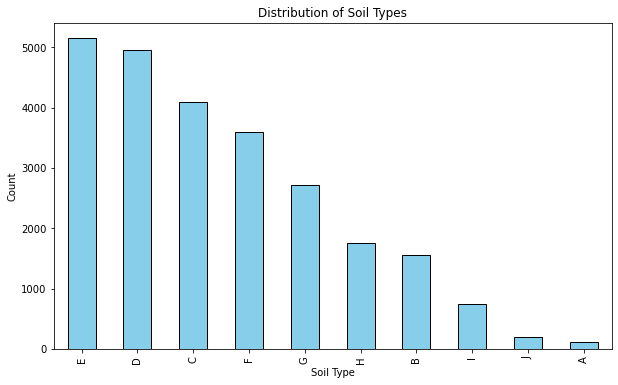

In [69]:
# Get the value counts of the 'Soil' column
soil_value_counts = df['Soil'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
soil_value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.title('Distribution of Soil Types')

# Show the plot
plt.show()

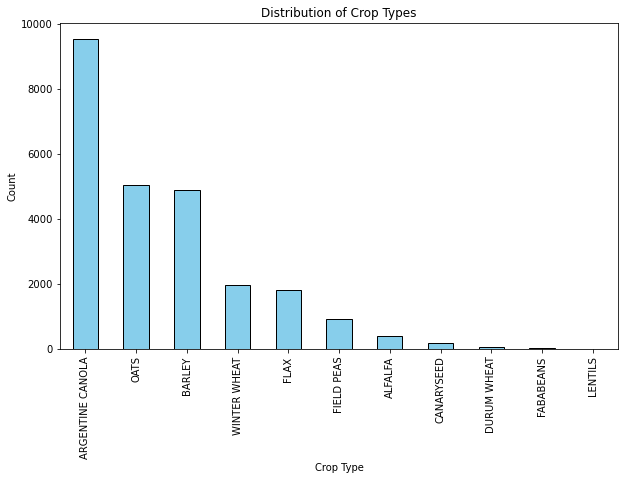

In [70]:
# Get the value counts of the 'Soil' column
crop_value_counts = df['Crop'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
crop_value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.title('Distribution of Crop Types')

# Show the plot
plt.show()

In [71]:
manitobaMunicipalities_gdf = gpd.read_file("MUNICIPALITY_5258922461173495881\\MG_MUNICIPALITY_POLY.shp")

manitobaMunicipalities_gdf

,MUNI_NO,MUNI_NAME,MUNI_TYPE,MUNI_LIST_,MUNI_LIST1,geometry
0,189,RM OF SPRINGFIELD,RM,SPRINGFIELD,SPRINGFIELD (RM),"POLYGON ((-10757459.464 6456526.821, -10757468..."
1,102,RM OF ARGYLE,RM,ARGYLE,ARGYLE (RM),"POLYGON ((-11060718.858 6365771.762, -11060672..."
2,169,RM OF ROLAND,RM,ROLAND,ROLAND (RM),"POLYGON ((-10879342.025 6350468.886, -10879339..."
3,151,RM OF MONTCALM,RM,MONTCALM,MONTCALM (RM),"POLYGON ((-10837073.626 6335234.827, -10836852..."
4,540,CITY OF FLIN FLON,CITY,FLIN FLON,FLIN FLON (CITY),"MULTIPOLYGON (((-11341354.484 7317922.661, -11..."
...,...,...,...,...,...,...
178,357,VILLAGE OF ST. PIERRE-JOLYS,VILLAGE,ST PIERRE-JOLYS,ST PIERRE-JOLYS (VILLAGE),"POLYGON ((-10797902.480 6349510.413, -10797904..."
179,710,NORWAY HOUSE-NORTHERN AFFAIRS ACT,NORTHERN COMMUNITY,NORWAY HOUSE,NORWAY HOUSE (NORTHERN COMMUNITY),"POLYGON ((-10893765.150 7179606.333, -10893746..."
180,712,PIKWITONEI-NORTHERN AFFAIRS ACT,NORTHERN COMMUNITY,PIKWITONEI,PIKWITONEI (NORTHERN COMMUNITY),"MULTIPOLYGON (((-10817895.865 7479353.767, -10..."
181,730,ROCK RIDGE-NORTHERN AFFAIRS ACT,NORTHERN COMMUNITY,ROCK RIDGE,ROCK RIDGE (NORTHERN COMMUNITY),"POLYGON ((-11084093.307 6784800.868, -11084101..."


<AxesSubplot:>

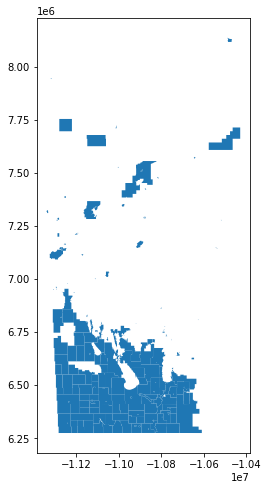

In [72]:
# Preliminary dataset inspection
manitobaMunicipalities_gdf.plot(
    figsize = (10, 8)
)   

# Missing Value Analysis

In [74]:
#Pivoting the table, make sure you check the ag function. 
df_clean_4=df.pivot_table(index=['Year', 'RM', 'Soil', 'Farms','Acres'], columns='Crop',values="Yield_in_Tons" )\
                .reset_index()

In [75]:
df_clean_4

Crop,Year,RM,Soil,Farms,Acres,ALFALFA,ARGENTINE CANOLA,BARLEY,CANARYSEED,DURUM WHEAT,FABABEANS,FIELD PEAS,FLAX,LENTILS,OATS,WINTER WHEAT
0,2000,ALEXANDER,E,10,1509.0,NaN,0.6291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,ALEXANDER,F,12,2401.0,NaN,0.6507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,ALEXANDER,H,5,1364.0,NaN,NaN,0.4887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,ALEXANDER,H,5,1464.0,NaN,0.3645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,ALEXANDER,H,6,1556.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4337,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17252,2022,YELLOWHEAD,C,10,2976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5100,NaN
17253,2022,YELLOWHEAD,C,20,6897.0,NaN,NaN,2.2437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17254,2022,YELLOWHEAD,C,59,29613.0,NaN,1.2339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17255,2022,YELLOWHEAD,D,16,3623.0,NaN,1.0908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_clean_4.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop,,,,,,,,
Year,17257.0,2010.231906,6.702819,2000.0000,2004.000000,2009.00000,2016.000000,2022.0000
Farms,17257.0,21.934925,18.603658,3.0000,10.000000,15.00000,27.000000,154.0000
Acres,17257.0,4884.942081,6046.747570,1000.0000,1545.000000,2598.00000,5328.000000,51742.0000
ALFALFA,80.0,2.157138,0.847359,0.5020,1.452750,2.18500,2.730000,4.3220
ARGENTINE CANOLA,8132.0,0.946357,0.265394,0.0297,0.774900,0.96390,1.147500,2.2977
BARLEY,3140.0,1.788170,0.493419,0.1350,1.471500,1.80900,2.138400,3.1563
CANARYSEED,68.0,0.464897,0.269445,0.0220,0.264500,0.42825,0.612250,1.2835
DURUM WHEAT,40.0,0.977198,0.212226,0.4860,0.849150,1.00710,1.091475,1.4391
FABABEANS,2.0,1.598500,0.328805,1.3660,1.482250,1.59850,1.714750,1.8310


In [88]:
# Creating list of columns
columns_yield = ['ALFALFA',
       'ARGENTINE CANOLA', 'BARLEY', 'CANARYSEED', 'DURUM WHEAT', 'FABABEANS','FIELD PEAS', 'FLAX', 'LENTILS', 'OATS', 'WINTER WHEAT']

In [82]:
df_clean_4

Crop,Year,RM,Soil,Farms,Acres,ALFALFA,ARGENTINE CANOLA,BARLEY,CANARYSEED,DURUM WHEAT,FABABEANS,FIELD PEAS,FLAX,LENTILS,OATS,WINTER WHEAT
0,2000,ALEXANDER,E,10,1509.0,NaN,0.6291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,ALEXANDER,F,12,2401.0,NaN,0.6507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,ALEXANDER,H,5,1364.0,NaN,NaN,0.4887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,ALEXANDER,H,5,1464.0,NaN,0.3645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,ALEXANDER,H,6,1556.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4337,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17252,2022,YELLOWHEAD,C,10,2976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5100,NaN
17253,2022,YELLOWHEAD,C,20,6897.0,NaN,NaN,2.2437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17254,2022,YELLOWHEAD,C,59,29613.0,NaN,1.2339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17255,2022,YELLOWHEAD,D,16,3623.0,NaN,1.0908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


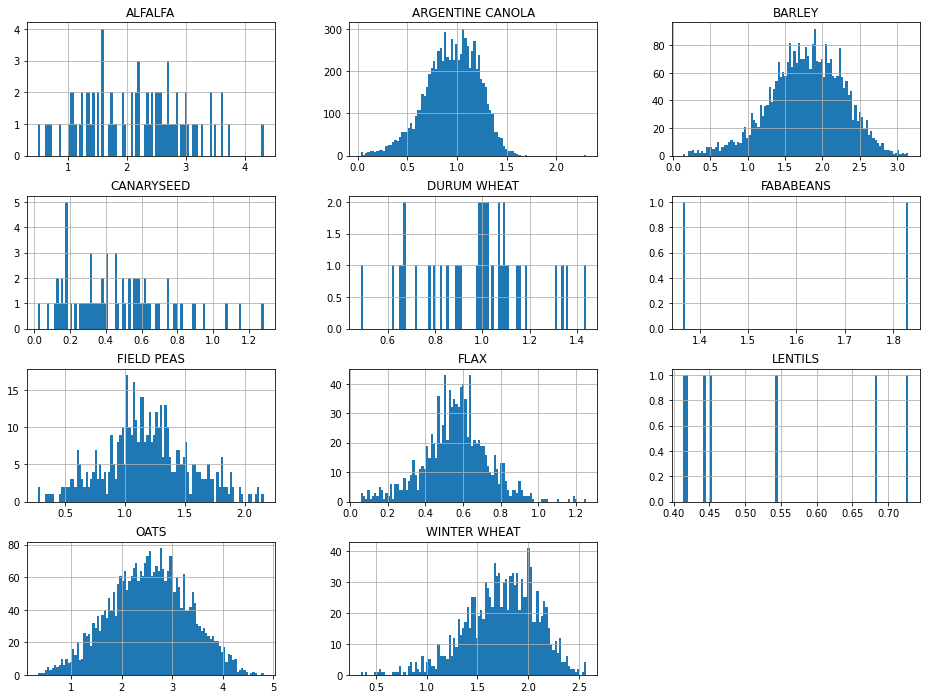

In [89]:
# When training models we want normal dist with zero mean and std of 1
# Data standarization  - zscore, min-max scler 

df_clean_4[columns_yield].hist(figsize=(16,12),
                       bins=100)
plt.show()